# Anomaly Sound Detection

## 4. Spectograms creation

<img src='soundanomaly.jpg' width = 600>

<div class="alert alert-info"> <b> In this notebook We will generate spectograms for all the files</b></div>

Serge Retkowsky | serge.retkowsky@microsoft.com | 02-Mar-2022 | V1

In [1]:
#!pip install basic_image_eda

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import librosa, librosa.display, IPython.display as ipd
import numpy as np
import wave
from scipy.io import wavfile as wav
import os
import os.path, time
import seaborn
import glob
from datetime import datetime
import shutil
from pathlib import Path
import urllib.request
from zipfile import ZipFile

In [3]:
import sys
sys.version

'3.6.9 |Anaconda, Inc.| (default, Jul 30 2019, 19:07:31) \n[GCC 7.3.0]'

In [4]:
import datetime
Current_Date = datetime.datetime.today()
print ('Current Date: ' + str(Current_Date))

Current Date: 2022-03-02 15:14:24.134902


In [5]:
def createdir(mydir):
    path = Path(mydir)
    if path.is_dir():
        print("Directory", mydir, 'exists so we will use it.')
    else:
        os.mkdir(mydir)

## Generating all the spectograms

In [6]:
durationsecs = 10
hoplength = 512
samprate = 44100
nfft = 2048

In [7]:
def spectogram_batch(wavdir, resultdir):
    createdir(resultdir)
    for root, _, files in os.walk(wavdir):
        print("Directory", root, "has", len(files), "files.")
    from datetime import datetime
    start_time = datetime.now()
    print("Creating the spectograms for all the wav files from", wavdir)
    print("\nRunning...\n")
    
    wavfiles = [file for file in os.listdir(wavdir) if file.endswith(('wav'))]
    
    for wavfile in wavfiles:
        
        plt.figure(figsize=(15, 7))
        wavfile = wavdir + wavfile
        print(wavfile)
        y, sr = librosa.load(wavfile,  sr = None, mono = True, offset = 0.0, duration = durationsecs)
        plt.ioff()
        fig = plt.figure()
        
        mel_signal = librosa.feature.melspectrogram(y=y, sr=sr, hop_length=hoplength, n_fft=nfft)
        spectrogram = np.abs(mel_signal)
        power_to_db = librosa.power_to_db(spectrogram, ref=np.max)
        librosa.display.specshow(power_to_db, sr=sr, x_axis='time', y_axis='mel', cmap='magma', hop_length=hoplength)

        plt.axis('off')
        outputfilename = wavfile.split('.')
        outputfilename = outputfilename[0].split('/')
        
        savefilename = resultdir + '/' + str(outputfilename[2]) + '.jpg'
        plt.savefig(savefilename, dpi = 300)
        plt.close('all')
    
    print('\nDone.')
    end_time = datetime.now()
    print("Execution time:", (end_time-start_time))

In [8]:
createdir("spectogramsmachine")

In [9]:
createdir("spectogramsmachine/OK")

In [10]:
createdir("spectogramsmachine/KO")

## Running the spectograms

In [11]:
spectogram_batch("soundssamples/KO/", "spectogramsmachine/KO/")

Directory spectogramsmachine/KO/ exists so we will use it.
Directory soundssamples/KO/ has 61 files.
Creating the spectograms for all the wav files from soundssamples/KO/

Running...

soundssamples/KO/machine_KO_1.wav
soundssamples/KO/machine_KO_10.wav
soundssamples/KO/machine_KO_11.wav
soundssamples/KO/machine_KO_12.wav
soundssamples/KO/machine_KO_13.wav
soundssamples/KO/machine_KO_14.wav
soundssamples/KO/machine_KO_15.wav
soundssamples/KO/machine_KO_16.wav
soundssamples/KO/machine_KO_17.wav
soundssamples/KO/machine_KO_18.wav
soundssamples/KO/machine_KO_19.wav
soundssamples/KO/machine_KO_2.wav
soundssamples/KO/machine_KO_20.wav
soundssamples/KO/machine_KO_21.wav
soundssamples/KO/machine_KO_22.wav
soundssamples/KO/machine_KO_23.wav
soundssamples/KO/machine_KO_24.wav
soundssamples/KO/machine_KO_25.wav
soundssamples/KO/machine_KO_26.wav
soundssamples/KO/machine_KO_27.wav
soundssamples/KO/machine_KO_28.wav
soundssamples/KO/machine_KO_29.wav
soundssamples/KO/machine_KO_3.wav
soundssamples/

In [12]:
spectogram_batch("soundssamples/OK/", "spectogramsmachine/OK/")

Directory spectogramsmachine/OK/ exists so we will use it.
Directory soundssamples/OK/ has 61 files.
Creating the spectograms for all the wav files from soundssamples/OK/

Running...

soundssamples/OK/machine_OK_1.wav
soundssamples/OK/machine_OK_10.wav
soundssamples/OK/machine_OK_11.wav
soundssamples/OK/machine_OK_12.wav
soundssamples/OK/machine_OK_13.wav
soundssamples/OK/machine_OK_14.wav
soundssamples/OK/machine_OK_15.wav
soundssamples/OK/machine_OK_16.wav
soundssamples/OK/machine_OK_17.wav
soundssamples/OK/machine_OK_18.wav
soundssamples/OK/machine_OK_19.wav
soundssamples/OK/machine_OK_2.wav
soundssamples/OK/machine_OK_20.wav
soundssamples/OK/machine_OK_21.wav
soundssamples/OK/machine_OK_22.wav
soundssamples/OK/machine_OK_23.wav
soundssamples/OK/machine_OK_24.wav
soundssamples/OK/machine_OK_25.wav
soundssamples/OK/machine_OK_26.wav
soundssamples/OK/machine_OK_27.wav
soundssamples/OK/machine_OK_28.wav
soundssamples/OK/machine_OK_29.wav
soundssamples/OK/machine_OK_3.wav
soundssamples/

## Checking the number of generated files

In [13]:
for root, _, files in os.walk('spectogramsmachine/OK/'):
    print("Directory", root, "has", len(files), "spectogram jpg files.")

Directory spectogramsmachine/OK/ has 61 spectogram jpg files.


In [14]:
for root, _, files in os.walk('spectogramsmachine/KO/'):
    print("Directory", root, "has", len(files), "spectogram jpg files.")

Directory spectogramsmachine/KO/ has 61 spectogram jpg files.


## EDA On the images to check the shape of each spectograms

In [15]:
def imageEDA(data_dir, option):
    from basic_image_eda import BasicImageEDA
    
    if option == 'basic':
        BasicImageEDA.explore(data_dir) # Use this for basic Image EDA    
    
    if option == 'advanced':
        extensions = ['jpg']
        threads = 0
        dimension_plot = True
        channel_hist = True
        nonzero = False
        hw_division_factor = 1.0
        BasicImageEDA.explore(data_dir, extensions, threads, dimension_plot, channel_hist, nonzero, hw_division_factor)

In [16]:
imageEDA("./spectogramsmachine/OK",  "basic")


found 61 images.
Using 4 threads. (max:4)



100%|██████████| 61/61 [00:02<00:00, 21.27it/s]


*--------------------------------------------------------------------------------------*
number of images                         |  61

dtype                                    |  uint8
channels                                 |  [3]
extensions                               |  ['jpg']

min height                               |  1200
max height                               |  1200
mean height                              |  1200.0
median height                            |  1200

min width                                |  1800
max width                                |  1800
mean width                               |  1800.0
median width                             |  1800

mean height/width ratio                  |  0.6666666666666666
median height/width ratio                |  0.6666666666666666
recommended input size(by mean)          |  [1200 1800] (h x w, multiples of 8)
recommended input size(by mean)          |  [1200 1792] (h x w, multiples of 16)
recommended input size(by 

In [17]:
imageEDA("./spectogramsmachine/KO", "basic")


found 61 images.
Using 4 threads. (max:4)



100%|██████████| 61/61 [00:02<00:00, 20.63it/s]


*--------------------------------------------------------------------------------------*
number of images                         |  61

dtype                                    |  uint8
channels                                 |  [3]
extensions                               |  ['jpg']

min height                               |  1200
max height                               |  1200
mean height                              |  1200.0
median height                            |  1200

min width                                |  1800
max width                                |  1800
mean width                               |  1800.0
median width                             |  1800

mean height/width ratio                  |  0.6666666666666666
median height/width ratio                |  0.6666666666666666
recommended input size(by mean)          |  [1200 1800] (h x w, multiples of 8)
recommended input size(by mean)          |  [1200 1792] (h x w, multiples of 16)
recommended input size(by 

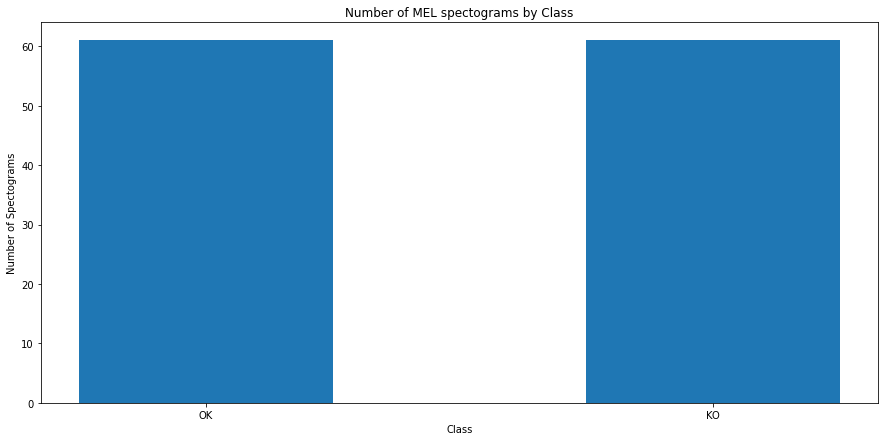

In [18]:
number_classes = {'OK': len(os.listdir('spectogramsmachine/OK')),
                'KO': len(os.listdir('spectogramsmachine/KO')) }

plt.figure(figsize=(15, 7))
plt.bar(number_classes.keys(), number_classes.values(), width = .5);
plt.title("Number of MEL spectograms by Class");
plt.xlabel('Class');
plt.ylabel('Number of Spectograms');

## Zipping the files

In [19]:
createdir("zip")

In [20]:
shutil.make_archive("zip/spectograms", 'zip', "spectogramsmachine/")

'/mnt/batch/tasks/shared/LS_root/mounts/clusters/seretkow9/code/Users/seretkow/Sound/MachineSoundAnomaly/zip/spectograms.zip'

In [21]:
!ls zip/spectograms.zip -ls

52455 -rwxrwxrwx 1 root root 53712976 Mar  2 15:16 zip/spectograms.zip


In [22]:
from IPython.display import FileLink
LINK = FileLink(path='zip/spectograms.zip')
print("Click to download the file:")
LINK

Click to download the file:


/mnt/batch/tasks/shared/LS_root/mounts/clusters/seretkow9/code/Users/seretkow/Sound/MachineSoundAnomaly/zip/spectograms.zip

Now you can use Azure Custom Vision to create an image classification model

> End. You can go to the next notebook